# Assignment 3

You only need to write one line of code for each question. When answering questions that ask you to identify or interpret something, the length of your response doesn’t matter. For example, if the answer is just ‘yes,’ ‘no,’ or a number, you can just give that answer without adding anything else.

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that **no outside searches are required by the assignment!**). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Clustering and Resampling

Let's set up our workspace and use the **Iris dataset** from `scikit-learn`. This dataset is a classic dataset in machine learning and statistics, widely used for clustering tasks. It consists of many samples of iris flowers. Here are the key features and characteristics of the dataset:

##### Features:
1. **Sepal Length**: The length of the sepal in centimeters.
2. **Sepal Width**: The width of the sepal in centimeters.
3. **Petal Length**: The length of the petal in centimeters.
4. **Petal Width**: The width of the petal in centimeters.

In [29]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


#### **Question 1:**
#### Data inspection

#### Load the Iris dataset:

Use scikit-learn to load the Iris dataset and convert it into a Pandas DataFrame.
Display the first few rows of the dataset. How many observations (rows) and features (columns) does the dataset contain?

In [30]:
from sklearn.datasets import load_iris
# Load Iris dataset
iris_data = load_iris()
# Convert to Dataframe
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
# Print
print(iris_df)
# Your code here...
print(f'observations:{iris_df.shape[0]}; features {iris_df.shape[1]}')

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
observations:150; features 4


#### **Question 2:**
#### Data-visualization

Let's create plots to visualize the relationships between the features (sepal length, sepal width, petal length, petal width).


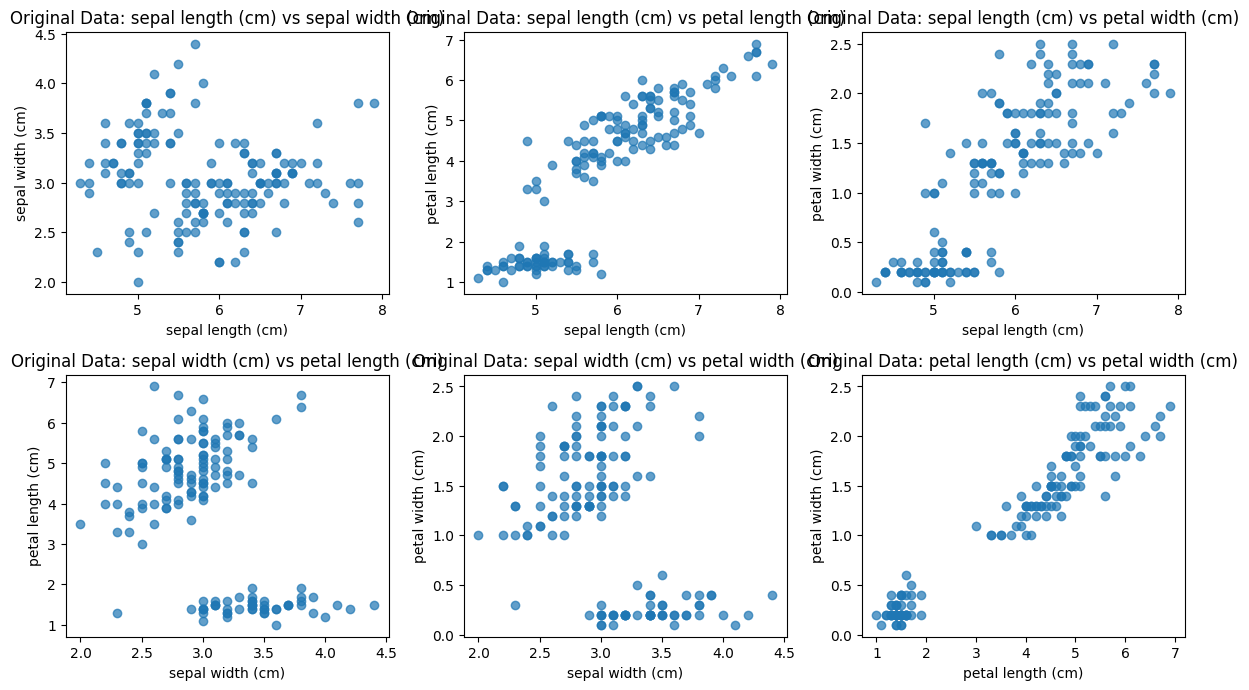

In [31]:
def plot_feature_pairs(data, feature_names, color_labels=None, title_prefix=''):
    """
    Helper function to create scatter plots for all possible pairs of features.

    Parameters:
    - data: DataFrame containing the features to be plotted.
    - feature_names: List of feature names to be used in plotting.
    - color_labels: Optional. Cluster or class labels to color the scatter plots.
    - title_prefix: Optional. Prefix for plot titles to distinguish between different sets of plots.
    """
    # Create a figure for the scatter plots
    plt.figure(figsize=(12, 10))

    # Counter for subplot index
    plot_number = 1

    # Loop through each pair of features
    for i in range(len(feature_names)):
        for j in range(i + 1, len(feature_names)):
            plt.subplot(len(feature_names)-1, len(feature_names)-1, plot_number)

            # Scatter plot colored by labels if provided
            if color_labels is not None:
                plt.scatter(data[feature_names[i]], data[feature_names[j]],
                            c=color_labels, cmap='viridis', alpha=0.7)
            else:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], alpha=0.7)

            plt.xlabel(feature_names[i])
            plt.ylabel(feature_names[j])
            plt.title(f'{title_prefix}{feature_names[i]} vs {feature_names[j]}')

            # Increment the plot number
            plot_number += 1

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

# Get feature names
feature_names = iris_df.columns

# Use the helper function to plot scatter plots without coloring by cluster labels
plot_feature_pairs(iris_df, feature_names, title_prefix='Original Data: ')

**Question:**
- Do you notice any patterns or relationships between the different features? How might these patterns help in distinguishing between different species?

Looking at these plots, we can spot some interesting patterns in the Iris dataset that could really help us tell apart different species of iris flowers.
The relationship between sepal length and sepal width seems pretty scattered, without a clear pattern. This tells us that these two features don't have a strong connection, so they might not be the best indicators for distinguishing between species. On the other hand, there's a strong positive correlation between sepal length and petal length—the longer the sepal, the longer the petal tends to be. This clear relationship could be quite useful for telling the species apart. Sepal length and petal width also show a positive correlation, though it's not as obvious as the one with petal length. Still, this link could come in handy when trying to classify the flowers. The connection between sepal width and petal length is weaker, suggesting that this pair of features might not be as helpful for distinguishing species. The same goes for sepal width and petal width—their relationship isn't very strong, with the points spread out more randomly. The real standout is the relationship between petal length and petal width. It’s almost a straight line, showing a very strong correlation. As the petal length increases, the petal width increases right along with it. This pattern is super useful for identifying different species because the size of the petals varies a lot between them.

#### **Question 3:**
#### Data cleaning

In [32]:
# Initialize StandardScaler
scaler = StandardScaler()
# Scale all the features
scaled_features = scaler.fit_transform(iris_df)
# Create new DataFrame with scaled features
scaled_iris_df = pd.DataFrame(scaled_features, columns=iris_data.feature_names)

print(scaled_iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


Why is it important to standardize the features of a dataset before applying clustering algorithms like K-Means? Discuss the implications of using unstandardized data in your analysis.

Before using clustering algorithms like K-Means, it's important to standardize your dataset's features because their different scales can heavily influence the results.

K-Means works by minimizing the Euclidean distance between data points and cluster centers. If some features have much larger scales than others, they'll dominate these distance calculations, skewing the clustering. For example, if one feature ranges from 0 to 1000 and another from 0 to 1, the larger-scale feature will outweigh the smaller one, making the algorithm ignore key patterns.
Standardizing features (setting them to a mean of 0 and standard deviation of 1) levels the playing field, so each feature has the same influence on clustering. This leads to more accurate and meaningful results. Without standardization, the algorithm could focus too much on certain features, producing biased and less reliable clusters.

#### **Question 4:**
#### K-means clustering

Apply the K-Means clustering algorithm to the Iris dataset. Choose the value 3 for the number of clusters (`k=3`) and fit the model. Assign cluster labels to the original data and add them as a new column in the DataFrame.

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


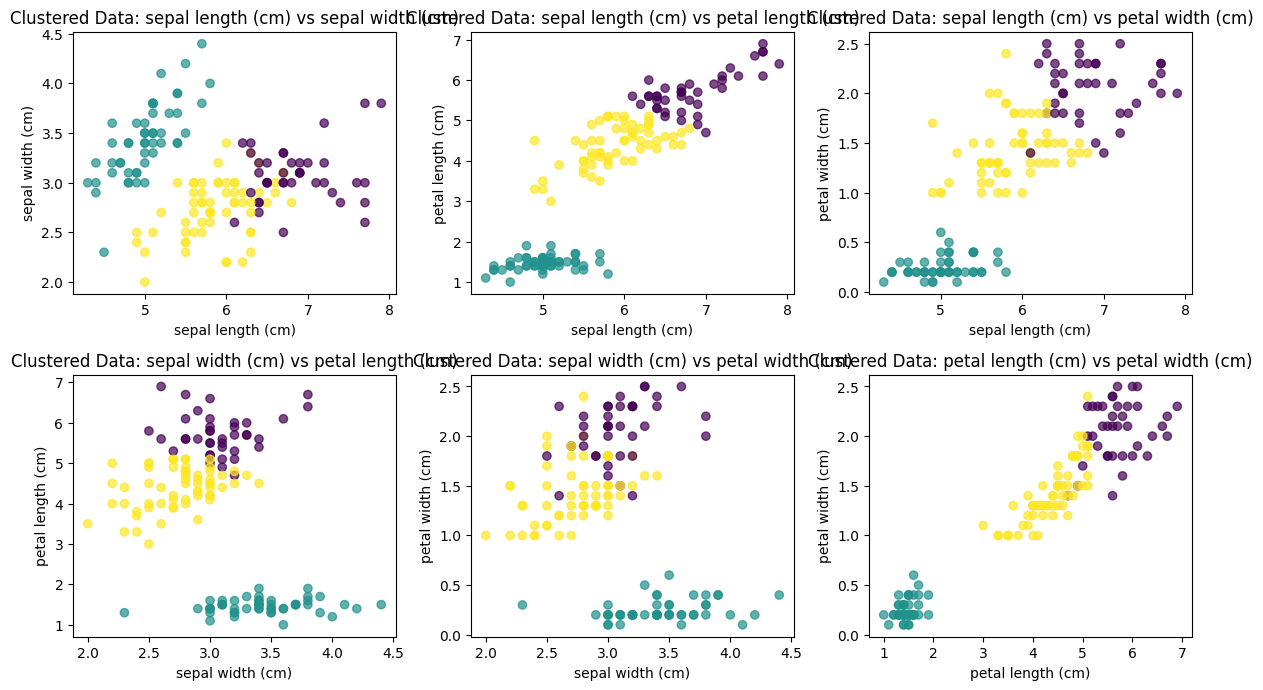

In [33]:
# Your answer...
# Init a K-Means model
kmeans = KMeans(n_clusters=3, random_state=42)
# Fit the K-Means model
kmeans.fit(iris_df)
# Assign the cluster labels
iris_df['Cluster'] = kmeans.labels_
print(iris_df.head())

# Assign the DataFrame to the variable `clustered_iris_data`
clustered_iris_data = iris_df
# Use the helper function to plot scatter plots
plot_feature_pairs(clustered_iris_data, feature_names, color_labels=clustered_iris_data['Cluster'], title_prefix='Clustered Data: ')

We chose `k=3` for the number of clusters arbitrarily. However, in a real-world scenario, it is important to determine the optimal number of clusters using appropriate methods.

**Question**: What is one method commonly used to determine the optimal number of clusters in K-means clustering, and why is this method helpful?

A popular way to figure out the best number of clusters in K-means is the Elbow Method. The idea is to run K-means with different numbers of clusters (K) and then plot the sum of squared errors (SSE) for each K. You’re looking for the point where the drop in error starts to level off, which looks like an “elbow” in the graph. That’s your sweet spot because adding more clusters after that doesn’t really make a big difference. The Elbow Method gives you a simple and clear way to find a good balance between cluster count and accuracy, while keeping you from overfitting the model.

#### **Question 5:**
#### Bootstrapping

Implement bootstrapping on the mean of Petal Width. Generate 10000 bootstrap samples, calculate the mean for each sample, and compute a 90% confidence interval.

In [34]:
# Your answer here...
# Extract the Petal Width column from the DataFrame
petal_width_data = iris_df['petal width (cm)']
# Random seed
np.random.seed(123)
# Generate 10,000 bootstrap samples and compute the mean of each sample
bootstrap_samples = np.random.choice(petal_width_data, size=(10000, len(petal_width_data)), replace=True)
bootstrap_means = np.mean(bootstrap_samples, axis=1)
# Calculate the mean of Petal Width from the bootstrap samples
mean_petal_width = np.mean(bootstrap_means)

np.random.seed(123)
# Compute the 90% confidence interval
lower_bound, upper_bound = np.percentile(bootstrap_means, [5, 95])
# Print
print(f"Mean of Petal Width: {mean_petal_width}")
print(f"90% Confidence Interval of Mean Petal Width: ({lower_bound}, {upper_bound})")

Mean of Petal Width: 1.2001690666666665
90% Confidence Interval of Mean Petal Width: (1.0979666666666665, 1.302)


**Question:**
- Why do we use bootstrapping in this context? What does it help us understand about the mean?

Bootstrapping is used here to understand how the mean of Petal Width might vary without assuming any specific data distribution. By resampling the data thousands of times, we can estimate how much the mean could change if we collected new data, giving us a sense of its stability. The key benefit of bootstrapping is that it lets us create a confidence interval for the mean. This interval shows the range where we expect the true mean to fall with a certain level of confidence. It's a practical way to quantify the uncertainty around our estimate of the mean.

**Question:**
- What is the purpose of calculating the confidence interval from the bootstrap samples? How does it help us interpret the variability of the estimate?

Calculating a confidence interval from bootstrap samples helps us measure how uncertain our estimate is. It gives a range where the true mean is likely to fall, based on the variation we see in the samples. A narrow interval means our estimate is pretty stable, while a wide one shows more uncertainty. It’s a way to see how much our guess of the mean might change if we repeated the analysis. Plus, it works well even if we don’t know the data’s exact distribution.

**Question:**

- Reflect on the variability observed in the bootstrapped means and discuss whether the mean of the Petal Width appears to be a stable and reliable estimate based on the confidence interval and the spread of the bootstrapped means.

If the bootstrap means don't vary much and the confidence interval is narrow, it means the Petal Width mean is stable and reliable. Even if the data changes a bit, the mean stays pretty consistent. But if the means are all over the place and the interval is wide, there's more uncertainty. In that case, the mean isn't as dependable because it's sensitive to the specific data sample.

# Criteria


| **Criteria**                                           | **Complete**                                      | **Incomplete**                                    |
|--------------------------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Data Inspection**                                    | Data is thoroughly inspected for the number of variables, observations, and data types, and relevant insights are noted. | Data inspection is missing or lacks detail.         |
| **Data Visualization**                                 | Visualizations (e.g., scatter plots) are well-constructed and correctly interpreted to explore relationships between features and species. | Visualizations are poorly constructed or not correctly interpreted. |
| **Clustering Implementation**                           | K-Means clustering is correctly implemented, and cluster labels are appropriately assigned to the dataset.            | K-Means clustering is missing or incorrectly implemented. |
| **Bootstrapping Process**                              | Bootstrapping is correctly performed, and results are used to assess variable mean stability. | Bootstrapping is missing or incorrectly performed. |

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [x] Created a branch with the correct naming convention.
- [x] Ensured that the repository is public.
- [x] Reviewed the PR description guidelines and adhered to them.
- [x] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-4-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
